In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import csv

from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM_copy import TwoCUM



In [7]:
AIF = np.load("data/AIF.npy")
series = np.load("data/Example_Conc.npy")
AIF.shape, series.shape

((150,), (192, 192, 30, 150))

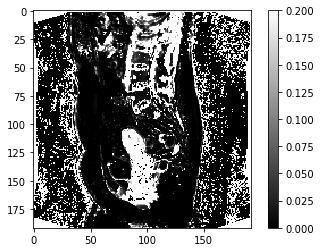

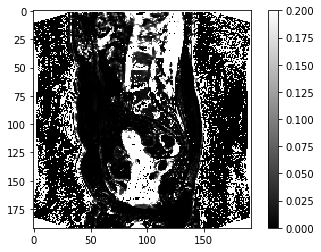

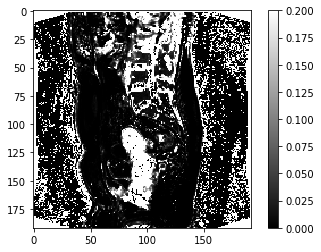

In [8]:
plt.imshow(series[:,:,14,100], clim = [0,0.2], cmap = 'gray')
plt.colorbar()
plt.show()

plt.imshow(series[:,:,13,100], clim = [0,0.2], cmap = 'gray')
plt.colorbar()
plt.show()

plt.imshow(series[:,:,15,100], clim = [0,0.2], cmap = 'gray')
plt.colorbar()
plt.show()
# plt.savefig('Example_Conc_14_100')

In [11]:
#For the uterus?

t = np.arange(0,366,2.45)

no_list1 = []

E_list1 = []
Fp_list1 = []
vp_list1 = []
min_list1 = []
max_list1 = []
ilist = np.arange(112, 120)
jlist = np.arange(80, 95)
klist = np.arange(10, 20)
range_dict1 = {}
for i in ilist:
    for j in jlist:
        for k in klist:
            if np.isnan(series[i,j,k,:]).all() == True:
                print('OUT: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                continue
            
                
            else:
                print('IN: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                range_dict1[(i,j,k)] = [series[i,j,k,:].min(), series[i,j,k,:].max()]
                try:
                    fitted_param = TwoCUMfittingConc(t, AIF, series[i,j,k,:] , 0)
                except ValueError as e:
                    print('Caught Value Error')
                    no_list1.append((i,j,k))
                    continue

                E_list1.append(fitted_param[0])
                Fp_list1.append(fitted_param[1])
                vp_list1.append(fitted_param[2])



IN:  112 80 10
min : max -0.0044261211209823716 0.08914706175159752
IN:  112 80 11
min : max -0.008705246342860993 0.14591365159566055
IN:  112 80 12
min : max -0.13298019101272218 2.7836345649253804
IN:  112 80 13
min : max -0.10929572661778594 1.0057279243969146
IN:  112 80 14
min : max -0.13992706517496073 1.9777000718206303
IN:  112 80 15
min : max -0.11051920471838172 1.2706516558443277
IN:  112 80 16
min : max -0.051811090559998774 1.4220252231096921
IN:  112 80 17
min : max -0.20978236829755936 3.633311663513185


/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:34: RuntimeWarning: overflow encountered in exp
  exptTp=np.exp(-1*t/Tp)
/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:136: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(temp**2))


IN:  112 80 18
min : max -0.07966560818118326 1.1292176083569774
IN:  112 80 19
min : max -0.026539169084269537 0.16530391530333505
IN:  112 81 10
min : max -0.004899749944697891 0.10615168969789535
IN:  112 81 11
min : max -0.007108569998782906 0.17313816382773545
IN:  112 81 12
min : max -0.06919857217033659 1.4594794150880905
IN:  112 81 13
min : max -0.057904622006921425 0.9993806523091462
IN:  112 81 14
min : max -0.08596472631248453 1.5567880082923762
IN:  112 81 15
min : max -0.047428060271949235 1.1131780578172914
IN:  112 81 16
min : max -0.031501802273179225 0.42348026752641793
IN:  112 81 17
min : max -0.025082566548599555 0.442725686354941
IN:  112 81 18
min : max -0.15752262709706566 2.4411715725440932
IN:  112 81 19
min : max -0.02731146706874852 0.24858743534134226
IN:  112 82 10
min : max -0.006340461810371716 0.15894613730811122
IN:  112 82 11
min : max -0.00484027333621264 0.1561269563755576
IN:  112 82 12
min : max -0.02569858570499442 0.6918220053815616
IN:  112 82 

/usr/lib/python3/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


IN:  112 92 17
min : max -0.17344509269844954 3.379531886626721
IN:  112 92 18
min : max -0.4984626341083713 20.84546292886159
Caught Value Error
IN:  112 92 19
min : max -0.2800285247221169 3.7559507046372667
IN:  112 93 10
min : max -0.025165497017740415 0.031512254835290715
IN:  112 93 11
min : max -0.002123183820411864 0.01062612434777653
IN:  112 93 12
min : max -0.0026505799928168775 0.01984321227600056
IN:  112 93 13
min : max -0.06951143844472973 3.6183357536695997
IN:  112 93 14
min : max -0.007220515601073674 0.18377162250358078
IN:  112 93 15
min : max -0.010336644840422848 0.3231514536893017
IN:  112 93 16
min : max -0.093839360656915 3.3635187572555414
IN:  112 93 17
min : max -0.4596069636494303 7.341114704326203
Caught Value Error
IN:  112 93 18
min : max -0.0895411993725169 1.205515102885629
IN:  112 93 19
min : max -0.0829611984340754 1.17998102257202
IN:  112 94 10
min : max -0.01236357208676106 0.06120022134904418
IN:  112 94 11
min : max -0.0010337348937221533 0.007

IN:  113 89 19
min : max -0.9474184751281801 17.15421879394325
Caught Value Error
IN:  113 90 10
min : max -0.002377109868618058 0.027940682395623053
IN:  113 90 11
min : max -0.002704132106218983 0.03788025133768878
IN:  113 90 12
min : max -0.037588900122434765 1.1338597109117252
IN:  113 90 13
min : max -0.08373550686221498 3.999887077958803
IN:  113 90 14
min : max -0.29521590189686886 2.5891978833144558
IN:  113 90 15
min : max -0.021806394185782133 0.3192106147548518
IN:  113 90 16
min : max -0.04310206743431237 0.6061485852605656
IN:  113 90 17
min : max -0.15850037279555723 2.214702401275268
IN:  113 90 18
min : max -0.06221242256020626 1.53783425355756
IN:  113 90 19
min : max -0.2169086104491621 1.4008655998109398
IN:  113 91 10
min : max -0.008310269899351692 0.023647196914580754
IN:  113 91 11
min : max -0.002797801845909949 0.04161942053406521
IN:  113 91 12
min : max -0.019501235322170643 0.8260494611445689
IN:  113 91 13
min : max -0.012866044572857893 0.3053892426528333

IN:  114 87 13
min : max -0.029973134254085203 0.39240234924627837
IN:  114 87 14
min : max -0.05897281014008428 0.7345034205062384
IN:  114 87 15
min : max -0.3036323562526705 4.905900394859325
IN:  114 87 16
min : max -0.17485631325986062 4.400510817705628
IN:  114 87 17
min : max -0.05874298005695483 1.6477711613168995
IN:  114 87 18
min : max -0.10590292814350485 1.2977965682835435
IN:  114 87 19
min : max -0.6017416664864728 20.193745395893867
Caught Value Error
IN:  114 88 10
min : max -0.0022648652034767593 0.024486013256659223
IN:  114 88 11
min : max -0.03375059934416494 0.5296847942901878
IN:  114 88 12
min : max -0.013600071174631613 0.20587355206496677
IN:  114 88 13
min : max -0.01464093375455023 0.24470446030429108
IN:  114 88 14
min : max -0.1601117176110075 1.2165498078360484
IN:  114 88 15
min : max -0.21744532245127546 5.163909180888954
Caught Value Error
IN:  114 88 16
min : max -0.14141681197595302 4.5765654493666785
Caught Value Error
IN:  114 88 17
min : max -0.22

IN:  115 84 12
min : max -0.1277075289057652 2.6713902712241273
IN:  115 84 13
min : max -0.643927033789409 36.67580612333124
Caught Value Error
IN:  115 84 14
min : max -0.04222256747659969 2.2503515000287257
IN:  115 84 15
min : max -0.06024190588175524 1.1273566507839612
IN:  115 84 16
min : max -0.1486256230183114 1.631943803067636
IN:  115 84 17
min : max -0.027125778400164474 0.5077836899340157
IN:  115 84 18
min : max -0.07108941002813982 1.02586667810766
IN:  115 84 19
min : max -0.07835694127749782 1.2761207846550877
IN:  115 85 10
min : max -0.23308794313810544 8.75892151743733
Caught Value Error
IN:  115 85 11
min : max -0.040770742343982924 1.3825312793286475
IN:  115 85 12
min : max -0.530372243763978 30.075875634605122
Caught Value Error
IN:  115 85 13
min : max -0.060986574736016985 1.4092449887744856
IN:  115 85 14
min : max -0.2671216251166003 5.771109006640575
Caught Value Error
IN:  115 85 15
min : max -0.044136694823566414 1.3110361929078622
IN:  115 85 16
min : max

IN:  116 81 12
min : max -0.07520310519527229 1.390500396044682
IN:  116 81 13
min : max -0.06541288281981184 2.388728223452011
IN:  116 81 14
min : max -0.12661299303343881 1.686269185839192
IN:  116 81 15
min : max -0.028678523707217712 0.787273935940257
IN:  116 81 16
min : max -0.07538894108401484 1.4286265714457067
IN:  116 81 17
min : max -0.610394465612512 57.95595479907553
Caught Value Error
IN:  116 81 18
min : max -0.05895037722549373 0.8164359882585065
IN:  116 81 19
min : max -0.06652735963996104 0.6610092951009872
IN:  116 82 10
min : max -0.12097713335746241 3.7294844656968493
IN:  116 82 11
min : max -0.23796412843762327 8.4354532676739
Caught Value Error
IN:  116 82 12
min : max -0.07754404537597948 2.3528360075701205
IN:  116 82 13
min : max -0.09912380811539034 3.246860241332555
IN:  116 82 14
min : max -0.10307320576677903 1.9957867534030518
IN:  116 82 15
min : max -0.03977387468607954 0.9538123335946741
IN:  116 82 16
min : max -0.04599135833652335 1.45028715116721

IN:  116 93 14
min : max -0.049845659886276816 0.463880201881094
IN:  116 93 15
min : max -0.4347097345542331 7.724857397210442
Caught Value Error
IN:  116 93 16
min : max -0.37063709942476697 4.033450565056815
IN:  116 93 17
min : max -0.1573290540774332 1.9353283561200356
IN:  116 93 18
min : max -0.13487156269364564 4.393564999012135
Caught Value Error
IN:  116 93 19
min : max -0.6366561766687537 22.166440207684488
Caught Value Error
IN:  116 94 10
min : max -0.028026537536428586 0.19151655210920865
IN:  116 94 11
min : max -0.0011047287635980833 0.008880150466364619
IN:  116 94 12
min : max -0.0011441472418417305 0.014891908497270687
IN:  116 94 13
min : max -0.03666838986499829 0.830219084432096
IN:  116 94 14
min : max -0.599336580045366 50.14469244562199
Caught Value Error
IN:  116 94 15
min : max -0.07016091474703773 1.7799567757013273
IN:  116 94 16
min : max -0.04128332625394482 1.1781815089079972
IN:  116 94 17
min : max -0.14059819615802427 2.617477692054272
IN:  116 94 18


IN:  117 90 10
min : max -0.003427752789714333 0.04602882251764537
IN:  117 90 11
min : max -0.05188863056753262 0.8010170916609767
IN:  117 90 12
min : max -0.083492285764797 1.2271026025866882
IN:  117 90 13
min : max -0.10376509429660624 1.0991352874582845
IN:  117 90 14
min : max -0.186970794724785 1.9868738294086519
IN:  117 90 15
min : max -0.10452273378828036 2.934239753668505
IN:  117 90 16
min : max -0.5765977093487933 9.542090722146906
Caught Value Error
IN:  117 90 17
min : max -0.7186152230057913 10.578712541189843
Caught Value Error
IN:  117 90 18
min : max -0.4115660278556367 5.6755070719753995
Caught Value Error
IN:  117 90 19
min : max -0.9322622112948236 24.396729193890195
Caught Value Error
IN:  117 91 10
min : max -0.003054548985931216 0.04280583278323745
IN:  117 91 11
min : max -0.10508668693487438 1.3983702963955094
IN:  117 91 12
min : max -0.17970424255068318 1.7053167561274307
IN:  117 91 13
min : max -0.07727673423968132 1.0269622487860144
IN:  117 91 14
min :

Caught Value Error
IN:  118 86 19
min : max -0.03077852536303341 0.6468075317225381
IN:  118 87 10
min : max -0.07995916846174866 4.081797975100699
IN:  118 87 11
min : max -0.1683726228469139 5.6701364723734144
Caught Value Error
IN:  118 87 12
min : max -0.2032969627055956 9.375584749927018
Caught Value Error
IN:  118 87 13
min : max nan nan
Caught Value Error
IN:  118 87 14
min : max -0.5538682710168796 12.471256440297482
Caught Value Error
IN:  118 87 15
min : max -0.1632520837075116 2.0854800734185526
IN:  118 87 16
min : max -0.1910590951114317 3.8560187368697325
IN:  118 87 17
min : max -0.37928881582775986 11.245298998088495
Caught Value Error
IN:  118 87 18
min : max -0.19920092154089053 3.663120188944257
IN:  118 87 19
min : max -0.16082497178314825 2.4938865656875544
IN:  118 88 10
min : max -0.113408222018064 4.220932079915813
IN:  118 88 11
min : max -0.09258785178558537 4.717892460877136
Caught Value Error
IN:  118 88 12
min : max -0.5244721359414641 36.68174406613282
Cau

IN:  119 83 17
min : max -0.24229524994627794 5.455425862900136
Caught Value Error
IN:  119 83 18
min : max -0.015133832965854202 0.2731577192612874
IN:  119 83 19
min : max -0.000819640059699648 0.012727929545291576
IN:  119 84 10
min : max -0.604438065524386 120.11665355397821
Caught Value Error
IN:  119 84 11
min : max -0.44515214374865253 10.529336064280056
Caught Value Error
IN:  119 84 12
min : max -0.22279048242717892 11.35883570881999
Caught Value Error
IN:  119 84 13
min : max -0.6478460423041679 424.6196494865591
Caught Value Error
IN:  119 84 14
min : max -0.19374054455089174 4.0952211474669005
IN:  119 84 15
min : max -0.1537056741467676 1.9062200417779926
IN:  119 84 16
min : max -0.20875323767946807 3.417577980935172
IN:  119 84 17
min : max -0.14197796335079427 3.1294670811190657
IN:  119 84 18
min : max -0.06757215885845852 1.635509362378856
IN:  119 84 19
min : max -0.0032599257772751803 0.07212607431428636
IN:  119 85 10
min : max -0.21471203929565186 7.04912782253887

In [21]:
print(len(no_list1), "/", (120-112)*(95-80)*(20-10))

E_list_uterus = np.array(E_list1)
np.save('data/E_list_uterus', E_list_uterus)

Fp_list_uterus = np.array(Fp_list1)
np.save('data/Fp_list_uterus', Fp_list_uterus)

vp_list_uterus = np.array(vp_list1)
np.save('data/vp_list_uterus', vp_list_uterus)


295 / 1200


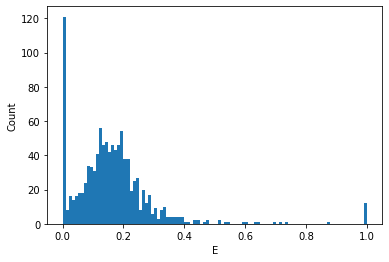

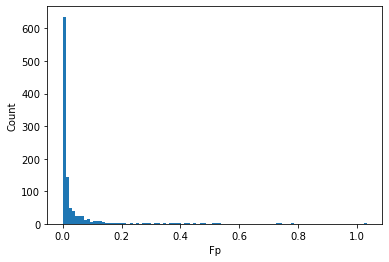

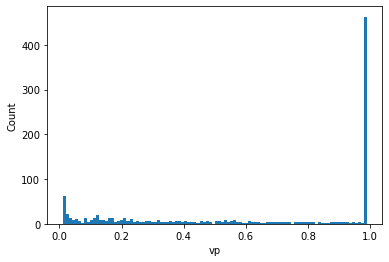

<Figure size 432x288 with 0 Axes>

In [97]:
plt.hist(E_list1, bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.savefig('data/E_hist_SQ')
plt.show()
plt.clf()

plt.hist(Fp_list1, bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.savefig('data/Fp_hist_SQ')
plt.show()
plt.clf()

plt.hist(vp_list1, bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.savefig('data/vp_hist_SQ')

plt.show()
plt.clf()

Extreme values: nan to nan


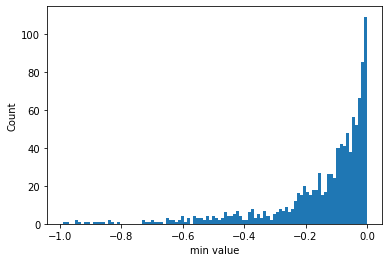

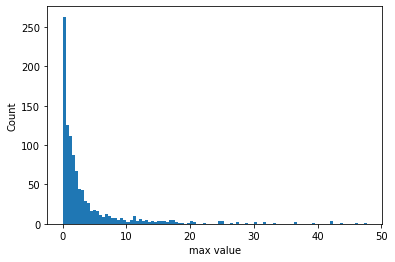

<Figure size 432x288 with 0 Axes>

In [98]:
#min and max histograms for all points including the ones that didnt work
range_list1= np.array(list(range_dict1.values()))
min_list1 = range_list1[:,0]
max_list1 = range_list1[:,1]

print('Extreme values:', min_list1.min(), 'to', max_list1.max())

plt.hist(min_list1[min_list1 > -1], bins = 100)
plt.xlabel('min value')
plt.ylabel('Count')
plt.savefig('data/min_all_hist_SQ')
plt.show()
plt.clf()

plt.hist(max_list1[max_list1 < 50], bins = 100)
plt.xlabel('max value')
plt.ylabel('Count')
plt.savefig('data/max_all_hist_SQ')
plt.show()
plt.clf()

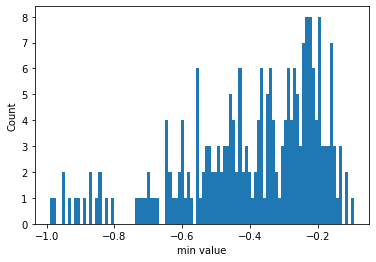

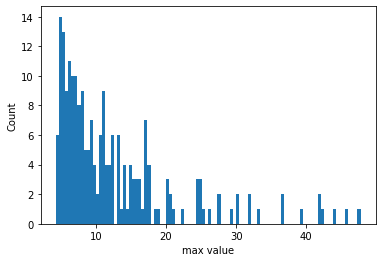

<Figure size 432x288 with 0 Axes>

In [81]:
#Now do the same but only for the ones that the modelling didn't like

range_nolist1 = np.array([range_dict1[x] for x in no_list1])
min_nolist1 = range_nolist1[:,0]
max_nolist1 = range_nolist1[:,1]

plt.hist(min_nolist1[min_nolist1 > -1], bins = 100)
plt.xlabel('min value')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(max_nolist1[max_nolist1 < 50], bins = 100)
plt.xlabel('max value')
plt.ylabel('Count')
plt.show()
plt.clf()

#Everything not in no list only for max



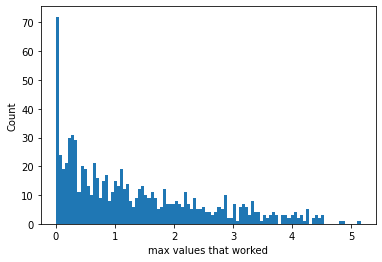

<Figure size 432x288 with 0 Axes>

In [99]:
#Everything except the ones that didn't work

map_1 = np.isin(max_list1,max_nolist1,invert = True)
max_new1 = max_list1[map_1 == True]

plt.hist(max_new1[max_new1 < 50], bins = 100)
plt.xlabel('max values that worked')
plt.ylabel('Count')
plt.savefig('data/max_no_error_hist_SQ')

plt.show()
plt.clf()

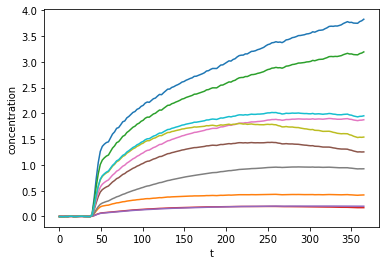

In [86]:

for i in range(10):
    idx = np.random.randint(low = 0, high = len(E_list1))
    E = E_list1[idx]
    Fp = Fp_list1[idx]
    vp = vp_list1[idx]
    pk = np.array([E, Fp, vp])
    predicted_curve = TwoCUM(pk, t, AIF, 0)
    
    plt.plot(t, predicted_curve)
 
plt.xlabel('t')
plt.ylabel('concentration')
plt.savefig('data/10_plots')
plt.show()

## Belly Concentration Images



In [64]:
t = np.arange(0,366,2.45)

no_list = []

E_list = []
Fp_list = []
vp_list = []
min_list = []
max_list = []
ilist = np.arange(50, 70)
jlist = np.arange(80, 95)
klist = np.arange(10, 20)
range_dict = {}
for i in ilist:
    for j in jlist:
        for k in klist:
            if np.isnan(series[i,j,k,:]).all() == True:
                print('OUT: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                continue
            
                
            else:
                print('IN: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                range_dict[(i,j,k)] = [series[i,j,k,:].min(), series[i,j,k,:].max()]
                try:
                    fitted_param = TwoCUMfittingConc(t, AIF, series[i,j,k,:] , 0)
                except ValueError as e:
                    print('Caught Value Error')
                    no_list.append((i,j,k))
                    continue

                E_list.append(fitted_param[0])
                Fp_list.append(fitted_param[1])
                vp_list.append(fitted_param[2])


IN:  50 80 10
min : max -0.094519259769198 0.07669201591532715
IN:  50 80 11
min : max -0.10775696635267669 0.03934035933067348
IN:  50 80 12
min : max -0.014481868458368314 0.013706364243501357
IN:  50 80 13
min : max -0.015578948025417982 0.026447820577493286
IN:  50 80 14
min : max -0.006184496378353062 0.025875824742526338
IN:  50 80 15
min : max -0.006282122752227448 0.029777945919801575
IN:  50 80 16
min : max -0.023526562734334164 0.46330420162068275
IN:  50 80 17
min : max -0.012179949183802136 0.3946573282717239
IN:  50 80 18
min : max -0.008682417018401042 0.2511669690156624
IN:  50 80 19
min : max -0.01750762249592451 0.1747495300428813
IN:  50 81 10
min : max -0.1362877823618303 0.06101516847357627
IN:  50 81 11
min : max -0.013491959358990314 0.006192992776259204
IN:  50 81 12
min : max -0.012021663572236701 0.01606286216210486
IN:  50 81 13
min : max -0.044439420797175576 0.13164458515144387
IN:  50 81 14
min : max -0.03441245948121896 0.12152632987272202
IN:  50 81 15
mi

/Users/michaelmclaren/ProgProjects/Adam/tkmodel/TwoCUM_copy.py:34: RuntimeWarning: overflow encountered in exp
  exptTp=np.exp(-1*t/Tp)
/Users/michaelmclaren/ProgProjects/Adam/tkmodel/TwoCUM_copy.py:136: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(temp**2))


IN:  50 83 14
min : max -1.155725430258507 105.19091364578253
Caught Value Error
IN:  50 83 15
min : max -0.10745424750707055 1.3934908290564398
IN:  50 83 16
min : max -0.1029686049664551 1.4282570716060812
IN:  50 83 17
min : max -0.01120919799189857 0.293544430152887
IN:  50 83 18
min : max -0.010353689609281173 0.28578447032847476
IN:  50 83 19
min : max -0.025217362491285075 0.287965769086705
IN:  50 84 10
min : max -0.012051115175329658 0.025513307553195197
IN:  50 84 11
min : max -0.16505138945442932 1.5523133440872958
IN:  50 84 12
min : max -0.09898272863494417 1.6297160333939367
IN:  50 84 13
min : max -0.09884083918612924 2.7031358958623155
IN:  50 84 14
min : max -0.2550011075486319 4.788558023604674
Caught Value Error
IN:  50 84 15
min : max -0.02475508801078835 0.35740895634219516
IN:  50 84 16
min : max -0.07107745007466826 0.7862334921708856
IN:  50 84 17
min : max -0.20522682056049857 2.4958305035020745
IN:  50 84 18
min : max -0.02855111476584629 0.3825425178811882
IN

/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


IN:  50 85 18
min : max -0.12865125692432566 1.0305462890464026
IN:  50 85 19
min : max -0.17176959860019148 0.689274723875247
IN:  50 86 10
min : max -0.015789946861630218 0.03200415116108972
IN:  50 86 11
min : max -0.03757061389964733 0.39555852591211105
IN:  50 86 12
min : max -0.0560363367723648 1.1040037900887685
IN:  50 86 13
min : max -0.08215404909387758 1.3819662818297558
IN:  50 86 14
min : max -0.06860873981236731 0.4884814274563404
IN:  50 86 15
min : max -0.16420807603084997 0.4113538453030894
IN:  50 86 16
min : max -0.15834278812095381 0.4772459165081506
IN:  50 86 17
min : max -0.14788749936814893 0.16639730575098644
IN:  50 86 18
min : max -0.053916795992428074 0.10797646075568015
IN:  50 86 19
min : max -0.05440171566304308 0.17542170862106726


/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IN:  50 87 10
min : max -0.3879014650176513 2.479601082324375
IN:  50 87 11
min : max -0.12947578095300805 1.0374716929000654
IN:  50 87 12
min : max -0.09239144120241782 0.8773735517915145
IN:  50 87 13
min : max -0.09526528983463367 0.4337313212959001
IN:  50 87 14
min : max -0.08163813638192441 0.28267328192071284
IN:  50 87 15
min : max -0.5194462734424501 0.49475975297251606
IN:  50 87 16
min : max -0.8335092945947404 0.6341387474137985
IN:  50 87 17
min : max -0.1452540809297138 0.12836744661857735
IN:  50 87 18
min : max -0.056349137544012856 0.056823445555879926
IN:  50 87 19
min : max -0.0279807427702371 0.08701393927512688
IN:  50 88 10
min : max -0.3113996980937537 2.1848598724139197
IN:  50 88 11
min : max -0.6976827782717776 5.422248468038095
Caught Value Error
IN:  50 88 12
min : max -0.13206580984057803 2.332350742584554
IN:  50 88 13
min : max -0.14491997190210726 0.6092416791927575
IN:  50 88 14
min : max -0.21971144351736238 0.44026301441649984
IN:  50 88 15
min : max

IN:  51 84 16
min : max -0.08692501061463687 0.7431881250656809
IN:  51 84 17
min : max -0.2411588805443794 3.6322920077066208
IN:  51 84 18
min : max -0.07506793468462608 0.9218112814472676
IN:  51 84 19
min : max -0.017259566983311422 0.05888191295381573
IN:  51 85 10
min : max -0.010200200428540203 0.01918523340502598
IN:  51 85 11
min : max -0.11346870442106127 1.4151514179173748
IN:  51 85 12
min : max -0.14691430716748494 2.4690791049776704
IN:  51 85 13
min : max -0.21000874270026904 3.896936174131514
IN:  51 85 14
min : max -0.10318956378674815 1.8811697793126614
IN:  51 85 15
min : max -0.22421515828740735 2.1875039836543975
IN:  51 85 16
min : max -0.05358051493457 0.37812811538973384
IN:  51 85 17
min : max -0.025677078262712982 0.24888972388104147
IN:  51 85 18
min : max -0.049031163337397765 0.24524901782253947
IN:  51 85 19
min : max -0.12048867581733369 0.5823027298984538
IN:  51 86 10
min : max -0.008639817964027033 0.044124622572764324
IN:  51 86 11
min : max -0.035562

IN:  52 82 12
min : max -0.13071379548446377 0.8508872709488373
IN:  52 82 13
min : max -0.10427052846326537 0.8292107988415095
IN:  52 82 14
min : max -0.04671976414316646 0.7315202140556178
IN:  52 82 15
min : max -0.053429847777231254 0.9161258362742941
IN:  52 82 16
min : max -0.02086308941483382 0.4025914048464724
IN:  52 82 17
min : max -0.007420345759500208 0.27302394978037037
IN:  52 82 18
min : max -0.004306297784975141 0.22624061201716508
IN:  52 82 19
min : max -0.01366890204973719 0.19960856641514058
IN:  52 83 10
min : max -0.012482347433247179 0.011606459237112829
IN:  52 83 11
min : max -0.199341084358222 1.6502340181104276
IN:  52 83 12
min : max -0.08160663509038746 1.7364022436568618
IN:  52 83 13
min : max -0.08833442805680791 1.3545019328915218
IN:  52 83 14
min : max -0.08510264299230116 1.9603445870355076
IN:  52 83 15
min : max -0.08728104896194111 1.5895048960022335
IN:  52 83 16
min : max -0.014281173831653227 0.20374672857168377
IN:  52 83 17
min : max -0.0190

Caught Value Error
IN:  52 94 17
min : max -4.819561702276227 96.88304554527615
Caught Value Error
IN:  52 94 18
min : max -3.1503889127633684 40.269897666265756
Caught Value Error
IN:  52 94 19
min : max -1.756877891055753 4.501402248397707
IN:  53 80 10
min : max -0.05583346740286113 0.07973652310154578
IN:  53 80 11
min : max -0.07214375422078678 0.05462009236448523
IN:  53 80 12
min : max -0.010595013112699931 0.010717114292758081
IN:  53 80 13
min : max -0.00565030700996914 0.013014004164841601
IN:  53 80 14
min : max -0.003114049159906212 0.014343486772905811
IN:  53 80 15
min : max -0.04157603352968921 0.19971592830133744
IN:  53 80 16
min : max -0.029468230885107798 0.4296790646231864
IN:  53 80 17
min : max -0.009420882668121678 0.27200476340704455
IN:  53 80 18
min : max -0.004105872306240203 0.14727771566597272
IN:  53 80 19
min : max -0.007273479517542387 0.1098077696529127
IN:  53 81 10
min : max -0.26193807363713506 0.2187227926279558
IN:  53 81 11
min : max -0.0424667689

IN:  53 92 13
min : max -0.009156963862014568 0.0375922046282583
IN:  53 92 14
min : max -0.08835912891805242 0.7553953593014562
IN:  53 92 15
min : max -0.08913871727440725 0.8192870123938448
IN:  53 92 16
min : max -0.07331125074995981 0.9305446340090818
IN:  53 92 17
min : max -0.08818954434865955 1.0338602094163982
IN:  53 92 18
min : max -0.24253824392029588 1.8639382599527539
IN:  53 92 19
min : max -1.0418819971774047 7.573958442222014
Caught Value Error
IN:  53 93 10
min : max -0.10053816032240359 0.4820224302554632
IN:  53 93 11
min : max -0.00542992014540572 0.04738590502485715
IN:  53 93 12
min : max -0.004531422888107629 0.03287851254678229
IN:  53 93 13
min : max -0.007576817744187031 0.039708739258497265
IN:  53 93 14
min : max -0.05457353052060032 0.6384552391267336
IN:  53 93 15
min : max -0.12743905457098492 1.0213351802493327
IN:  53 93 16
min : max -0.1714072175187633 0.9802309186374909
IN:  53 93 17
min : max -0.32624102648502773 1.574265661737504
IN:  53 93 18
min 

IN:  54 89 18
min : max -0.0033395025926625486 0.025938223722872487
IN:  54 89 19
min : max -0.005324203793258493 0.036199109280939744
IN:  54 90 10
min : max -0.15608093035432857 0.7035821798284265
IN:  54 90 11
min : max -0.0022503143670902503 0.02536858824592985
IN:  54 90 12
min : max -0.004410538603238111 0.020326202011081
IN:  54 90 13
min : max -0.0036548923631668437 0.028393766844794797
IN:  54 90 14
min : max -0.004411550288752682 0.02431605176840618
IN:  54 90 15
min : max -0.0017731563256771256 0.025586070674933153
IN:  54 90 16
min : max -0.0061350193818870205 0.03174702265175148
IN:  54 90 17
min : max -0.0049651509996518975 0.028206138464161895
IN:  54 90 18
min : max -0.006508051961842683 0.022933899716668517
IN:  54 90 19
min : max -0.0033993396692839975 0.03238072328604738
IN:  54 91 10
min : max -0.14364992483029626 1.855880199046458
IN:  54 91 11
min : max -0.0031092210734459877 0.024926241708765652
IN:  54 91 12
min : max -0.0043732123013113244 0.020153914196492838


IN:  55 87 13
min : max -0.004031375976549401 0.02896327703022608
IN:  55 87 14
min : max -0.014045635587206527 0.05031820698876848
IN:  55 87 15
min : max -0.0052030953479402925 0.04639506055163412
IN:  55 87 16
min : max -0.00378794656592215 0.02911289091555106
IN:  55 87 17
min : max -0.0035208288571582855 0.0317717370234577
IN:  55 87 18
min : max -0.03557321131918417 0.6421746864789337
IN:  55 87 19
min : max -0.0087582198276491 0.04592554295675812
IN:  55 88 10
min : max -0.6672716425764165 5.018954238334019
IN:  55 88 11
min : max -0.0038718873118737535 0.01680428643403202
IN:  55 88 12
min : max -0.002639551618904626 0.020135615122430207
IN:  55 88 13
min : max -0.00616858812131834 0.02989568869805568
IN:  55 88 14
min : max -0.006058571810178895 0.03135027129033398
IN:  55 88 15
min : max -0.005767521353844517 0.03078261995270226
IN:  55 88 16
min : max -0.002610000692154703 0.019345961359813247
IN:  55 88 17
min : max -0.0036403250387673884 0.024015420824161922
IN:  55 88 18


IN:  56 84 17
min : max -0.010933598384982077 0.022136535586581803
IN:  56 84 18
min : max -0.00446246085912453 0.023986268864570344
IN:  56 84 19
min : max -0.004879512470546202 0.015638586513958944
IN:  56 85 10
min : max -0.40971668144264717 5.816326787475548
Caught Value Error
IN:  56 85 11
min : max -0.04978025921438706 0.5583110584494837
IN:  56 85 12
min : max -0.016994695214895023 0.3048773978053604
IN:  56 85 13
min : max -0.023664938116002246 0.589515338515377
IN:  56 85 14
min : max -0.07300087682676676 1.4659288095437724
IN:  56 85 15
min : max -0.006552684421952143 0.15429949771128715
IN:  56 85 16
min : max -0.004107464149688683 0.1001785038809621
IN:  56 85 17
min : max -0.03430145820606975 0.15250227762087235
IN:  56 85 18
min : max -0.05728769274395268 0.5934686140304657
IN:  56 85 19
min : max -0.0033748306730812805 0.026752393843732923
IN:  56 86 10
min : max -0.3067618295496819 2.1388112603569716
IN:  56 86 11
min : max -0.006516259026262725 0.04758368727609141
IN: 

IN:  57 82 11
min : max -0.07031847668976868 0.36996570925447403
IN:  57 82 12
min : max -0.0501426499271872 0.9982489235015282
IN:  57 82 13
min : max -0.12256518232729124 3.156599090783536
IN:  57 82 14
min : max -1.0656045424225562 51.28020850165522
Caught Value Error
IN:  57 82 15
min : max -0.17562108007201035 1.465522748967796
IN:  57 82 16
min : max -0.03092071062577506 1.1424305228719975
IN:  57 82 17
min : max -0.029364948181377526 1.0431709291621527
IN:  57 82 18
min : max -0.010173622360051232 0.2963691719632896
IN:  57 82 19
min : max -0.005546535255095207 0.12586677708403038
IN:  57 83 10
min : max -0.006135899298283511 0.012780882581513765
IN:  57 83 11
min : max -0.08383571912166282 1.9049303387155645
IN:  57 83 12
min : max -0.10009916764861754 2.7509039220745737
IN:  57 83 13
min : max -0.1372839400892787 4.419844572126421
IN:  57 83 14
min : max -0.6075958526359506 18.433001462048857
Caught Value Error
IN:  57 83 15
min : max -0.21775990825768715 3.929799108231061
IN:

IN:  57 94 14
min : max -0.003110769882364573 0.023065096936404957
IN:  57 94 15
min : max -0.0029552702648450446 0.01775927861775138
IN:  57 94 16
min : max -0.0053403706046300375 0.01961813907407802
IN:  57 94 17
min : max -0.004081150718255107 0.020128448997433983
IN:  57 94 18
min : max -0.0019918629645945297 0.017204669476164572
IN:  57 94 19
min : max -0.004763523742109154 0.024466846807346017
IN:  58 80 10
min : max -0.006077278972191898 0.020222573595407026
IN:  58 80 11
min : max -0.08914052796847147 0.18386795431589437
IN:  58 80 12
min : max -0.012514754185877337 0.030986157077359758
IN:  58 80 13
min : max -0.006882555535518607 0.014371385721733885
IN:  58 80 14
min : max -0.02178089983040097 0.1418203859774333
IN:  58 80 15
min : max -0.012561016471423603 0.33446700073514024
IN:  58 80 16
min : max -0.011281284458712133 0.2406381314716417
IN:  58 80 17
min : max -0.02270897520908409 0.3340315240600399
IN:  58 80 18
min : max -0.16140017293494835 3.124286659308826
IN:  58 8

IN:  58 91 19
min : max -0.00842511993824499 0.03632733018162633
IN:  58 92 10
min : max -0.0290530615367679 0.1440250479932817
IN:  58 92 11
min : max -0.0061198029474126905 0.02338355902739788
IN:  58 92 12
min : max -0.005604468613912145 0.028093450838822448
IN:  58 92 13
min : max -0.004312670181382882 0.024812256748857762
IN:  58 92 14
min : max -0.00300615557824601 0.01614719610237167
IN:  58 92 15
min : max -0.0025823768177262382 0.015515379727894074
IN:  58 92 16
min : max -0.0039059053279331193 0.023483760848511524
IN:  58 92 17
min : max -0.003549182301064449 0.022522294224985855
IN:  58 92 18
min : max -0.0034348942648293225 0.021795688104376033
IN:  58 92 19
min : max -0.008865397724124917 0.03170371563511255
IN:  58 93 10
min : max -0.005428607782239983 0.02312115598456639
IN:  58 93 11
min : max -0.003205228091871508 0.01926389848604145
IN:  58 93 12
min : max -0.004144107967908386 0.02491907291358477
IN:  58 93 13
min : max -0.004801916718015806 0.026287273889131137
IN: 

IN:  59 89 14
min : max -0.10902137660207811 1.006386080087418
IN:  59 89 15
min : max -0.20552741141238373 1.1680410352661506
IN:  59 89 16
min : max -0.003718088878733223 0.021384970059164777
IN:  59 89 17
min : max -0.0026470071343629824 0.024165910711265216
IN:  59 89 18
min : max -0.04850139625525951 0.4989660001914347
IN:  59 89 19
min : max -0.09463557757837504 0.5541704821010693
IN:  59 90 10
min : max -0.008094275882053845 0.010296143778742294
IN:  59 90 11
min : max -0.015306080406213146 0.0070938477539778805
IN:  59 90 12
min : max -0.006175982539818062 0.022694497050531795
IN:  59 90 13
min : max -0.0035118738473692845 0.04032417843597598
IN:  59 90 14
min : max -0.2079352775783987 1.2779433424648847
IN:  59 90 15
min : max -0.01161528622944782 0.028410419786199757
IN:  59 90 16
min : max -0.002092628701429955 0.03020713803812059
IN:  59 90 17
min : max -0.00390900627801468 0.02350247311617666
IN:  59 90 18
min : max -0.004103726478547006 0.031546403550143286
IN:  59 90 19


IN:  60 86 17
min : max -0.3237372360358047 1.6796698808571366
IN:  60 86 18
min : max -0.10392443336754886 0.6862251980480192
IN:  60 86 19
min : max -0.00895188977899293 0.028459258608213536
IN:  60 87 10
min : max -0.08114385558869291 0.4567290453950328
IN:  60 87 11
min : max -0.0030562652403928955 0.016416730567115886
IN:  60 87 12
min : max -0.003513104610732058 0.023361374093740554
IN:  60 87 13
min : max -0.0063798704968736075 0.029987456516867204
IN:  60 87 14
min : max -0.009335134967902198 0.031212100407318033
IN:  60 87 15
min : max -0.0032340735554877292 0.026254193222825607
IN:  60 87 16
min : max -0.00472098603103047 0.0211127638029059
IN:  60 87 17
min : max -0.006860512505269513 0.030708036592141226
IN:  60 87 18
min : max -0.07367638674655969 0.7417550373288684
IN:  60 87 19
min : max -0.011743248813484014 0.04195296403641456
IN:  60 88 10
min : max -0.004576168499594045 0.022444682140661268
IN:  60 88 11
min : max -0.002866254216652833 0.021248675096557187
IN:  60 88

IN:  61 84 11
min : max -0.17911149962038875 4.7569315333606585
Caught Value Error
IN:  61 84 12
min : max -0.2100087147347024 6.529577843374467
Caught Value Error
IN:  61 84 13
min : max -0.033946824807981946 2.6236101528202087
IN:  61 84 14
min : max -0.15540766197025313 3.4405624518364175
IN:  61 84 15
min : max -0.3375466929893266 8.704526506265655
Caught Value Error
IN:  61 84 16
min : max -0.004918129905935174 0.0684854769262132
IN:  61 84 17
min : max -0.0018396789408282113 0.022601828603096674
IN:  61 84 18
min : max -0.004367935358151762 0.010518432125420078
IN:  61 84 19
min : max -0.007056345331521614 0.009699745498671884
IN:  61 85 10
min : max -0.05502190329422124 0.5380958331584298
IN:  61 85 11
min : max -0.0021308082794464153 0.040615839011904825
IN:  61 85 12
min : max -0.0031233009379763137 0.05542189406514264
IN:  61 85 13
min : max -0.003375135252443876 0.06475187293071344
IN:  61 85 14
min : max -0.008184035650900486 0.09955518096948768
IN:  61 85 15
min : max -0.0

IN:  62 81 14
min : max -0.058394140327138244 0.9743131206027295
IN:  62 81 15
min : max -0.06179531959649867 0.6417551229859678
IN:  62 81 16
min : max -0.04038311726931186 0.37601639586933266
IN:  62 81 17
min : max -0.02914517115938206 0.3428491051059447
IN:  62 81 18
min : max -0.024943843053226 0.5796337698531373
IN:  62 81 19
min : max -0.008485470592908464 0.21724706968145507
IN:  62 82 10
min : max -0.08402509565108612 0.19634305099451518
IN:  62 82 11
min : max -0.39531230878892376 6.105986980731527
Caught Value Error
IN:  62 82 12
min : max nan nan
Caught Value Error
IN:  62 82 13
min : max -0.20941019767080257 2.5425532736734846
IN:  62 82 14
min : max -0.08276949597270594 1.1775381790020751
IN:  62 82 15
min : max -0.014205700728595758 0.2002888288608198
IN:  62 82 16
min : max -0.023391482377072954 0.31862422735537965
IN:  62 82 17
min : max -0.17785492311668233 4.274038987536031
IN:  62 82 18
min : max -0.02560844308111057 0.7698865649718658
IN:  62 82 19
min : max -0.007

IN:  62 93 18
min : max -0.00551025805198831 0.031820751800529436
IN:  62 93 19
min : max -0.003213191094400311 0.03126787522252777
IN:  62 94 10
min : max -0.10288994521075612 1.4870994448686827
IN:  62 94 11
min : max -0.0013627953095952626 0.034161045687973395
IN:  62 94 12
min : max -0.005796671012340361 0.03859742160734955
IN:  62 94 13
min : max -0.006244652875560988 0.03420933293724576
IN:  62 94 14
min : max -0.007159377606180961 0.0293689637451882
IN:  62 94 15
min : max -0.007921309710316106 0.04264873662244888
IN:  62 94 16
min : max -0.0137434925241047 0.08306055364337572
IN:  62 94 17
min : max -0.6406699381473007 6.639005555632761
Caught Value Error
IN:  62 94 18
min : max -0.008647950054804607 0.04449816200035772
IN:  62 94 19
min : max -0.004947101152197025 0.03925739786105088
IN:  63 80 10
min : max -0.07800181486788402 0.08521075028975228
IN:  63 80 11
min : max -0.04789073673153965 0.16150912773018228
IN:  63 80 12
min : max -0.014263383103989363 0.05558095431085239


IN:  63 91 11
min : max -0.0090382921400112 0.03748903878561732
IN:  63 91 12
min : max -0.004836256226156008 0.03881704601632158
IN:  63 91 13
min : max -0.009639166845418566 0.04715271619466716
IN:  63 91 14
min : max -0.010667288760730108 0.040692363762147354
IN:  63 91 15
min : max -0.11026933826123281 0.3690526783366048
IN:  63 91 16
min : max -0.00479095376503106 0.036845796039374545
IN:  63 91 17
min : max -0.0026602011011526636 0.025325190443360155
IN:  63 91 18
min : max -0.0036268488471561666 0.025443557392788665
IN:  63 91 19
min : max -0.004779072842713953 0.02314745861585083
IN:  63 92 10
min : max -0.124932139857172 1.1702133102180112
IN:  63 92 11
min : max -0.012632157795194457 0.048573062670203004
IN:  63 92 12
min : max -0.009217168720097639 0.04708579413867289
IN:  63 92 13
min : max -0.0062711744478192305 0.045550547780880496
IN:  63 92 14
min : max -0.04812515103534892 0.3847611609746783
IN:  63 92 15
min : max -0.05191455284395602 0.27435226364392423
IN:  63 92 16

IN:  64 88 15
min : max -0.011266673738979875 0.03991779787217266
IN:  64 88 16
min : max -0.005524539935395881 0.035095692161713626
IN:  64 88 17
min : max -0.007439492957227324 0.02826760111265013
IN:  64 88 18
min : max -0.0028113740462788646 0.026247524863818084
IN:  64 88 19
min : max -0.0031755217156711757 0.022802462866123547
IN:  64 89 10
min : max -0.19834917520919437 0.4816515959452905
IN:  64 89 11
min : max -0.0988623376664941 0.15905162943230244
IN:  64 89 12
min : max -0.5926752409635845 1.895876265566228
IN:  64 89 13
min : max -0.07682564336997755 0.6137167025529193
IN:  64 89 14
min : max -0.08437708019093826 0.3037143831652726
IN:  64 89 15
min : max -0.07897578376648673 0.2088809163989539
IN:  64 89 16
min : max -0.008150085872691795 0.0443204229231582
IN:  64 89 17
min : max -0.0054321221790944105 0.023465278634408525
IN:  64 89 18
min : max -0.001609552940197146 0.025482844343555168
IN:  64 89 19
min : max -0.003992882003830887 0.029622151681883452
IN:  64 90 10
mi

IN:  65 86 10
min : max -0.3984399710292328 3.1796661426601256
IN:  65 86 11
min : max -0.04749317455639035 0.3485138022935394
IN:  65 86 12
min : max -0.07352419978797409 0.5507977198526949
IN:  65 86 13
min : max -0.0944651435488254 0.16671599507897944
IN:  65 86 14
min : max -0.2631295008036991 0.1965864017135377
IN:  65 86 15
min : max -0.3734813340783669 0.33275277866806174
IN:  65 86 16
min : max -0.26435824406148334 0.3868469420827323
IN:  65 86 17
min : max -0.04714883346549556 0.0903359328223049
IN:  65 86 18
min : max -0.1614450016599368 1.0522624864836896
IN:  65 86 19
min : max -0.005727040877529441 0.02963012627874865
IN:  65 87 10
min : max -0.10988947379158354 0.9519437003225395
IN:  65 87 11
min : max -0.08564146504395509 0.5026198947011002
IN:  65 87 12
min : max -0.1808151022867761 0.39708636818891474
IN:  65 87 13
min : max -1.1028524368689756 1.1814692894505852
IN:  65 87 14
min : max -1.0070185088886023 2.1547860062806476
IN:  65 87 15
min : max -0.5587021502039571

IN:  66 83 17
min : max -0.06801409071786621 0.9514394877171416
IN:  66 83 18
min : max -0.02037115156221294 0.41685129895847056
IN:  66 83 19
min : max -0.005207817930951725 0.23450640323836108
IN:  66 84 10
min : max -0.1211895791251732 2.2584842510711836
IN:  66 84 11
min : max -0.4338708294328506 27.741232800695652
Caught Value Error
IN:  66 84 12
min : max -0.10353222688353625 2.452897705526743
IN:  66 84 13
min : max -0.013418723845285481 0.14192502560107426
IN:  66 84 14
min : max -0.04391703140582737 0.2696605893073547
IN:  66 84 15
min : max -0.08053819687318375 0.21505402167154186
IN:  66 84 16
min : max -0.0889320450166764 0.2434704498915808
IN:  66 84 17
min : max -0.205458723883007 1.6992583997201236
IN:  66 84 18
min : max -0.03623516015661188 0.4193664884852659
IN:  66 84 19
min : max -0.03408654110727735 0.242358167114399
IN:  66 85 10
min : max -0.06861460360314575 1.3364406542287504
IN:  66 85 11
min : max -0.06335296360230525 1.8141112172748732
IN:  66 85 12
min : ma

IN:  67 81 15
min : max -0.05207171893421596 0.5552825711812442
IN:  67 81 16
min : max -0.1337905788310892 0.4488073415966285
IN:  67 81 17
min : max -0.08123755911935514 0.35004444048155336
IN:  67 81 18
min : max -0.013470010719279567 0.07344049849118812
IN:  67 81 19
min : max -0.006675290317888969 0.07704038327752699
IN:  67 82 10
min : max -0.06622724966060123 0.3029199502495975
IN:  67 82 11
min : max -0.06756765770778839 1.1353564356455403
IN:  67 82 12
min : max -0.11114063930079415 1.9035532902958792
IN:  67 82 13
min : max nan nan
Caught Value Error
IN:  67 82 14
min : max -0.08739885639421305 1.2251265267916933
IN:  67 82 15
min : max -0.022854844647279517 0.27447866299445806
IN:  67 82 16
min : max -0.0165747296900634 0.3229722855154875
IN:  67 82 17
min : max -0.023058751391093 0.5366513620927851
IN:  67 82 18
min : max -0.01563497451686948 0.6742648584171131
IN:  67 82 19
min : max -0.003605742412467094 0.22177325637672393
IN:  67 83 10
min : max -0.5367760109409929 8.08

IN:  67 94 14
min : max -13.299114099523669 74.02443821195023
Caught Value Error
IN:  67 94 15
min : max -27.818221837032752 91.97389096089219
Caught Value Error
IN:  67 94 16
min : max -7.384560671591058 9.550755499204863
IN:  67 94 17
min : max -2.422013083852991 1.9974287690939576
IN:  67 94 18
min : max -1.269825161193967 1.2860959818442708
IN:  67 94 19
min : max -0.6888659003850197 0.90623526429561
IN:  68 80 10
min : max -0.025316335307201038 0.02626632061574899
IN:  68 80 11
min : max -0.002577006298027904 0.008222278840883607
IN:  68 80 12
min : max -0.00519426174596626 0.13404075992526188
IN:  68 80 13
min : max -0.00414011948465608 0.07224310068528383
IN:  68 80 14
min : max -0.004926174122060991 0.030382025491315315
IN:  68 80 15
min : max -0.021714023885280546 0.020880740049152184
IN:  68 80 16
min : max -0.023166764204138227 0.0215386976068938
IN:  68 80 17
min : max -0.004544558454133461 0.008647347071449898
IN:  68 80 18
min : max -0.0024983650134324242 0.00589987609364

IN:  68 92 10
min : max -0.3676914431263567 7.73766898904092
Caught Value Error
IN:  68 92 11
min : max -0.1155355972810761 0.7345074651580645
IN:  68 92 12
min : max -0.17505344778231657 0.43070374777830844
IN:  68 92 13
min : max -0.5111138949407326 0.8337251657711988
IN:  68 92 14
min : max -1.951952292365874 2.9563683707859054
IN:  68 92 15
min : max -6.414822410635814 45.50561275911717
Caught Value Error
IN:  68 92 16
min : max -2.5174753138343364 7.861498003749103
IN:  68 92 17
min : max -5.9500864669384725 129.96892969843162
Caught Value Error
IN:  68 92 18
min : max -11.526848817466458 230.9626389818513
Caught Value Error
IN:  68 92 19
min : max -2.4055924014752152 2.6938561067434135
IN:  68 93 10
min : max -0.15466924833195783 1.1107715919811298
IN:  68 93 11
min : max -0.19739226218683514 1.5423273366410502
IN:  68 93 12
min : max -1.0642303031775828 6.816191805331618
IN:  68 93 13
min : max -0.952848562912898 3.8694345052125536
IN:  68 93 14
min : max -3.3709108024170504 7.8

IN:  69 89 17
min : max -1.7451996822199964 2.9107533306675952
IN:  69 89 18
min : max -0.38509294648052683 0.7456844157973066
IN:  69 89 19
min : max -0.0923852862339613 0.15283335377103618
IN:  69 90 10
min : max -0.5684601449071098 4.0355303101714295
IN:  69 90 11
min : max -0.592913985758666 14.084967695910363
Caught Value Error
IN:  69 90 12
min : max -0.24481405436826864 1.2427665622995165
IN:  69 90 13
min : max -0.10760989325892012 0.6814369338811348
IN:  69 90 14
min : max -0.11410318618833948 0.43469173905529424
IN:  69 90 15
min : max -1.1038612917409627 2.9714141895629282
IN:  69 90 16
min : max -1.5663008129344638 2.8970991140445266
IN:  69 90 17
min : max -0.42226920675295254 1.5185428144105804
IN:  69 90 18
min : max -2.1449060297620473 2.222540753763729
IN:  69 90 19
min : max -0.619259958933436 0.545845608201406
IN:  69 91 10
min : max -0.10653865319117373 1.6893885847907255
IN:  69 91 11
min : max -0.6574503654214068 7.067088225271116
Caught Value Error
IN:  69 91 12


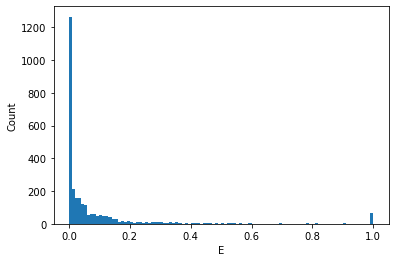

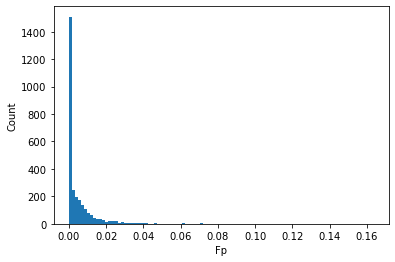

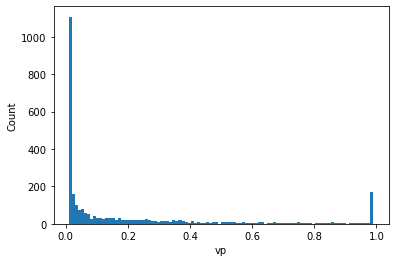

Extreme values: nan to nan


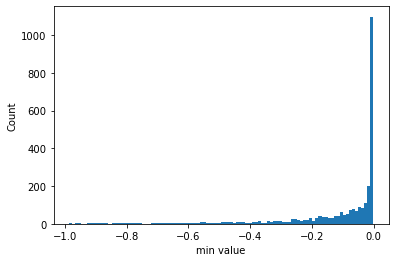

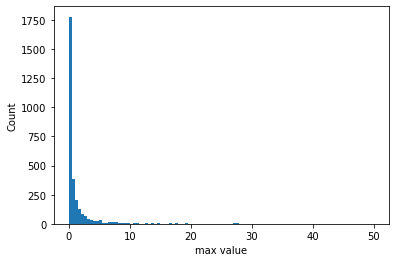

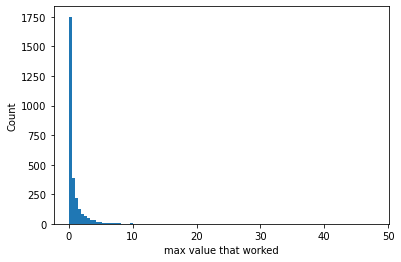

<Figure size 432x288 with 0 Axes>

In [72]:
plt.hist(E_list, bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.savefig('data/E_hist_belly')
plt.show()
plt.clf()

plt.hist(Fp_list, bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.savefig('data/Fp_hist_belly')
plt.show()
plt.clf()

plt.hist(vp_list, bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.savefig('data/vp_hist_belly')

plt.show()
plt.clf()

#min and max
range_list= np.array(list(range_dict.values()))
min_list = range_list[:,0]
max_list = range_list[:,1]

print('Extreme values:', min_list.min(), 'to', max_list.max())

plt.hist(min_list[min_list > -1], bins = 100)
plt.xlabel('min value')
plt.ylabel('Count')
plt.savefig('data/min_all_hist_belly')
plt.show()
plt.clf()

plt.hist(max_list[(max_list < 50) & (max_list > -1)], bins = 100)
plt.xlabel('max value')
plt.ylabel('Count')
plt.savefig('data/max_all_hist_belly')
plt.show()
plt.clf()

#not including the ones that didnt work
range_nolist = np.array([range_dict[x] for x in no_list])
min_nolist = range_nolist[:,0]
max_nolist = range_nolist[:,1]
map_ = np.isin(max_list,max_nolist,invert = True)
max_new = max_list[map_ == True]

plt.hist(max_new[(max_new < 50) & (max_new > -1)], bins = 100)
plt.xlabel('max value that worked')
plt.ylabel('Count')
plt.savefig('data/max_no_error_hist_belly')

plt.show()
plt.clf()

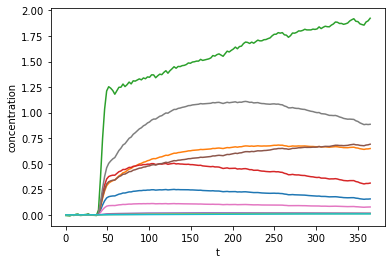

In [91]:
for i in range(10):
    idx = np.random.randint(low = 0, high = len(E_list1))
    E = E_list[idx]
    Fp = Fp_list[idx]
    vp = vp_list[idx]
    pk = np.array([E, Fp, vp])
    predicted_curve = TwoCUM(pk, t, AIF, 0)
    
    plt.plot(t, predicted_curve)
 
plt.xlabel('t')
plt.ylabel('concentration')
plt.savefig('data/10_plots_belly')
plt.show()

## Scatter plots of the uterus

In [105]:
#For the uterus?

t = np.arange(0,366,2.45)

no_list1 = []


min_list1 = []
max_list1 = []
para_dict = {}
ilist = np.arange(112, 120)
jlist = np.arange(80, 95)
klist = np.arange(10, 20)
range_dict1 = {}
for i in ilist:
    for j in jlist:
        for k in klist:
            if np.isnan(series[i,j,k,:]).all() == True:
                print('OUT: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                continue
            
                
            else:
                print('IN: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                range_dict1[(i,j,k)] = [series[i,j,k,:].min(), series[i,j,k,:].max()]
                try:
                    fitted_param = TwoCUMfittingConc(t, AIF, series[i,j,k,:] , 0)
                except ValueError as e:
                    print('Caught Value Error')
                    no_list1.append((i,j,k))
                    continue
                    
                para_dict[(i,j,k)] = [fitted_param[0], fitted_param[1], fitted_param[2]]



IN:  112 80 10
min : max -0.0044261211209823716 0.08914706175159752
IN:  112 80 11
min : max -0.008705246342860993 0.14591365159566055
IN:  112 80 12
min : max -0.13298019101272218 2.7836345649253804
IN:  112 80 13
min : max -0.10929572661778594 1.0057279243969146
IN:  112 80 14
min : max -0.13992706517496073 1.9777000718206303
IN:  112 80 15
min : max nan nan
Caught Value Error
IN:  112 80 16
min : max -0.051811090559998774 1.4220252231096921
IN:  112 80 17
min : max -0.20978236829755936 3.633311663513185
IN:  112 80 18
min : max -0.07966560818118326 1.1292176083569774
IN:  112 80 19
min : max -0.026539169084269537 0.16530391530333505
IN:  112 81 10
min : max -0.004899749944697891 0.10615168969789535
IN:  112 81 11
min : max -0.007108569998782906 0.17313816382773545
IN:  112 81 12
min : max -0.06919857217033659 1.4594794150880905
IN:  112 81 13
min : max -0.057904622006921425 0.9993806523091462
IN:  112 81 14
min : max -0.08596472631248453 1.5567880082923762
IN:  112 81 15
min : max n

Caught Value Error
IN:  112 92 16
min : max -0.20040813855698492 3.8766443552113676
IN:  112 92 17
min : max -0.17344509269844954 3.379531886626721
IN:  112 92 18
min : max -0.4984626341083713 20.84546292886159
Caught Value Error
IN:  112 92 19
min : max -0.2800285247221169 3.7559507046372667
IN:  112 93 10
min : max -0.025165497017740415 0.031512254835290715
IN:  112 93 11
min : max -0.002123183820411864 0.01062612434777653
IN:  112 93 12
min : max -0.0026505799928168775 0.01984321227600056
IN:  112 93 13
min : max -0.06951143844472973 3.6183357536695997
IN:  112 93 14
min : max -0.007220515601073674 0.18377162250358078
IN:  112 93 15
min : max nan nan
Caught Value Error
IN:  112 93 16
min : max -0.093839360656915 3.3635187572555414
IN:  112 93 17
min : max -0.4596069636494303 7.341114704326203
Caught Value Error
IN:  112 93 18
min : max -0.0895411993725169 1.205515102885629
IN:  112 93 19
min : max -0.0829611984340754 1.17998102257202
IN:  112 94 10
min : max -0.01236357208676106 0.0

IN:  113 90 11
min : max -0.002704132106218983 0.03788025133768878
IN:  113 90 12
min : max -0.037588900122434765 1.1338597109117252
IN:  113 90 13
min : max -0.08373550686221498 3.999887077958803
IN:  113 90 14
min : max -0.29521590189686886 2.5891978833144558
IN:  113 90 15
min : max nan nan
Caught Value Error
IN:  113 90 16
min : max -0.04310206743431237 0.6061485852605656
IN:  113 90 17
min : max -0.15850037279555723 2.214702401275268
IN:  113 90 18
min : max -0.06221242256020626 1.53783425355756
IN:  113 90 19
min : max -0.2169086104491621 1.4008655998109398
IN:  113 91 10
min : max -0.008310269899351692 0.023647196914580754
IN:  113 91 11
min : max -0.002797801845909949 0.04161942053406521
IN:  113 91 12
min : max -0.019501235322170643 0.8260494611445689
IN:  113 91 13
min : max -0.012866044572857893 0.3053892426528333
IN:  113 91 14
min : max -0.06203403058756625 0.4975055846631493
IN:  113 91 15
min : max nan nan
Caught Value Error
IN:  113 91 16
min : max -0.06303827118991359 

IN:  114 87 18
min : max -0.10590292814350485 1.2977965682835435
IN:  114 87 19
min : max -0.6017416664864728 20.193745395893867
Caught Value Error
IN:  114 88 10
min : max -0.0022648652034767593 0.024486013256659223
IN:  114 88 11
min : max -0.03375059934416494 0.5296847942901878
IN:  114 88 12
min : max -0.013600071174631613 0.20587355206496677
IN:  114 88 13
min : max -0.01464093375455023 0.24470446030429108
IN:  114 88 14
min : max -0.1601117176110075 1.2165498078360484
IN:  114 88 15
min : max nan nan
Caught Value Error
IN:  114 88 16
min : max -0.14141681197595302 4.5765654493666785
Caught Value Error
IN:  114 88 17
min : max -0.22484677142747256 6.748943692123059
Caught Value Error
IN:  114 88 18
min : max -0.088689874734274 1.493368904152524
IN:  114 88 19
min : max -0.16917441656826424 1.8348928393374568
IN:  114 89 10
min : max -0.00246243853399818 0.028098490534347164
IN:  114 89 11
min : max -0.03431148308721724 0.5800898359196885
IN:  114 89 12
min : max -0.014854941107673

IN:  115 85 10
min : max -0.23308794313810544 8.75892151743733
Caught Value Error
IN:  115 85 11
min : max -0.040770742343982924 1.3825312793286475
IN:  115 85 12
min : max -0.530372243763978 30.075875634605122
Caught Value Error
IN:  115 85 13
min : max -0.060986574736016985 1.4092449887744856
IN:  115 85 14
min : max -0.2671216251166003 5.771109006640575
Caught Value Error
IN:  115 85 15
min : max nan nan
Caught Value Error
IN:  115 85 16
min : max -0.030926419621672807 0.6898014343737712
IN:  115 85 17
min : max -0.4988820333281645 8.115911151445435
Caught Value Error
IN:  115 85 18
min : max -0.18962025803254878 2.504347013291798
IN:  115 85 19
min : max -0.045172379217733094 0.8081757079144976
IN:  115 86 10
min : max -0.1879205524043488 12.509143279002776
Caught Value Error
IN:  115 86 11
min : max -0.05030508078010715 1.5152288593927483
IN:  115 86 12
min : max -0.034264162227991 1.8233523867772847
IN:  115 86 13
min : max -0.13461401859106026 2.698398748999005
IN:  115 86 14
mi

IN:  116 82 14
min : max -0.10307320576677903 1.9957867534030518
IN:  116 82 15
min : max nan nan
Caught Value Error
IN:  116 82 16
min : max -0.04599135833652335 1.4502871511672148
IN:  116 82 17
min : max -0.6457494426402266 244.32315016446313
Caught Value Error
IN:  116 82 18
min : max -0.1983134183642261 7.292928340265975
Caught Value Error
IN:  116 82 19
min : max -0.10052080653208706 1.0557308363313551
IN:  116 83 10
min : max -0.26753744202984 13.990537574028167
Caught Value Error
IN:  116 83 11
min : max -0.12078782014843237 2.483815548675881
IN:  116 83 12
min : max -0.2562198052271085 5.66345061630495
Caught Value Error
IN:  116 83 13
min : max -0.7317294606439972 131.63489106869983
Caught Value Error
IN:  116 83 14
min : max -0.3265501850862933 8.198858016368586
Caught Value Error
IN:  116 83 15
min : max nan nan
Caught Value Error
IN:  116 83 16
min : max nan nan
Caught Value Error
IN:  116 83 17
min : max nan nan
Caught Value Error
IN:  116 83 18
min : max -0.0429153873186

IN:  116 94 19
min : max -0.215241819297884 4.445629906918952
Caught Value Error
IN:  117 80 10
min : max -0.013051692457369833 0.24751824842769488
IN:  117 80 11
min : max -0.05998825651220774 1.3230034874509249
IN:  117 80 12
min : max -0.3193101582243387 51.00587170750711
Caught Value Error
IN:  117 80 13
min : max -0.04455416475057278 1.2691862569613317
IN:  117 80 14
min : max -0.04687095715860523 0.8500811758568887
IN:  117 80 15
min : max nan nan
Caught Value Error
IN:  117 80 16
min : max -0.09148915740723759 0.8695036891986377
IN:  117 80 17
min : max -0.025180390390646998 0.6233258723069728
IN:  117 80 18
min : max -0.022902897000214056 0.4407843872374382
IN:  117 80 19
min : max -0.03128066023366852 0.24002052235807392
IN:  117 81 10
min : max -0.15931356453369072 4.815497996919023
Caught Value Error
IN:  117 81 11
min : max -0.0704037814403704 1.4916002099915484
IN:  117 81 12
min : max -0.02177967693238006 0.6451457529356045
IN:  117 81 13
min : max -0.01758964728224316 0.

IN:  117 91 18
min : max -0.1662492408394982 1.8437330773965246
IN:  117 91 19
min : max -0.27322068411703987 2.508513636434068
IN:  117 92 10
min : max -0.007203493770214314 0.036617897730781945
IN:  117 92 11
min : max -0.0038781290128106737 0.04180210265412905
IN:  117 92 12
min : max -0.01721775470498546 0.2658997020252083
IN:  117 92 13
min : max -0.03492823801613873 0.446310465946541
IN:  117 92 14
min : max -0.8674970222252365 39.452017884946976
Caught Value Error
IN:  117 92 15
min : max nan nan
Caught Value Error
IN:  117 92 16
min : max -0.05708066577533438 0.6363039405654133
IN:  117 92 17
min : max -0.11945429016778958 1.4275583725738918
IN:  117 92 18
min : max -0.3696859753456574 9.619652641443599
Caught Value Error
IN:  117 92 19
min : max -0.4220961064483393 4.384803595957593
IN:  117 93 10
min : max -0.00576193261491971 0.006519509848762525
IN:  117 93 11
min : max -0.00212884238524348 0.0078116063536602075
IN:  117 93 12
min : max -0.04005870064699513 1.06348688762873

IN:  118 88 19
min : max -0.1979350294187947 2.232450888799263
IN:  118 89 10
min : max -0.36694811345163814 10.846050471482554
Caught Value Error
IN:  118 89 11
min : max -0.41041502804446606 11.07572441446059
Caught Value Error
IN:  118 89 12
min : max nan nan
Caught Value Error
IN:  118 89 13
min : max nan nan
Caught Value Error
IN:  118 89 14
min : max -1.4878727561215168 347.34376158570024
Caught Value Error
IN:  118 89 15
min : max nan nan
Caught Value Error
IN:  118 89 16
min : max -0.20784362063714246 8.268190673928853
Caught Value Error
IN:  118 89 17
min : max -1.0487405273340542 298.7188080780131
Caught Value Error
IN:  118 89 18
min : max -0.28857445514075863 4.490306702041105
IN:  118 89 19
min : max -0.19934394219178314 2.1388900473980192
IN:  118 90 10
min : max -0.02294061636121069 0.4040303941476435
IN:  118 90 11
min : max -0.05056428513575531 0.8794645311104287
IN:  118 90 12
min : max -0.1548732714496054 3.026141324600076
IN:  118 90 13
min : max -0.2652814441007955

IN:  119 86 10
min : max -0.40517822527453407 11.69249337058399
Caught Value Error
IN:  119 86 11
min : max -0.1260278721108623 4.257775649523561
IN:  119 86 12
min : max -0.2704529599943102 8.354862820589119
Caught Value Error
IN:  119 86 13
min : max -0.10670284786271894 2.877220201650417
IN:  119 86 14
min : max -0.042189682044720705 0.6818859360086205
IN:  119 86 15
min : max nan nan
Caught Value Error
IN:  119 86 16
min : max -0.17833421992967247 3.7041032503381484
IN:  119 86 17
min : max -0.08120366360038583 1.612584596133945
IN:  119 86 18
min : max -0.036088564593510036 0.8868599239090185
IN:  119 86 19
min : max -0.023714125821673926 0.35294606999932143
IN:  119 87 10
min : max -0.4438640465861381 12.086244216455691
Caught Value Error
IN:  119 87 11
min : max -0.06888263317418264 2.9738671076007437
IN:  119 87 12
min : max -0.1658400918523324 4.909347052402243
Caught Value Error
IN:  119 87 13
min : max -0.6322265072812971 57.68263225358292
Caught Value Error
IN:  119 87 14
m

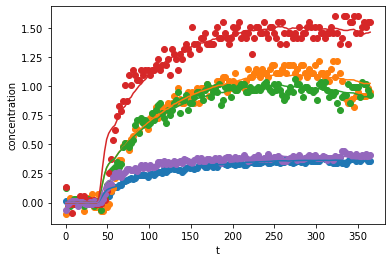

In [116]:
#scatter plot and fitted plots

for i in range(5):
    keys = list(para_dict.keys())
    
    pos = np.random.choice(np.arange(len(keys)))
    parameters = para_dict[keys[pos]]
    pk = np.array(parameters)
    predicted_curve = TwoCUM(pk, t, AIF, 0)
    plt.plot(t, predicted_curve)
    
    points = series[keys[pos][0],keys[pos][1],keys[pos][2],:]
    plt.scatter(t, points)
 
plt.xlabel('t')
plt.ylabel('concentration')
plt.savefig('data/10_plots_scatter')
plt.show()

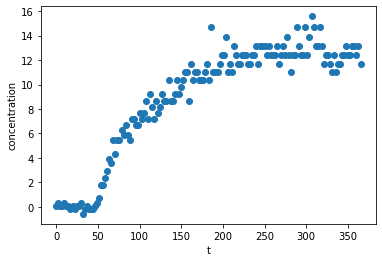

In [137]:
#scatter plots for the plots that didnt work


for i in range(1):
    
    pos = np.random.choice(np.arange(len(no_list1)))
    
    points = series[no_list1[pos][0],no_list1[pos][1],no_list1[pos][2],:]
    plt.scatter(t, points)
 
plt.xlabel('t')
plt.ylabel('concentration')
plt.savefig('data/1_3_scatter_nonelist')
plt.show()

In [139]:
np.save('data/nonelist', np.array(no_list1))

In [144]:
name = 'layer_dict.a.layer_dict.b.weight'
name = name.replace('layer_dict.', '')
name = name.replace('.weight', '')
name = name.replace('.', '_')
name

'a_b'

In [151]:
a = torch.tensor((True, False, True, False))
torch.count_nonzero(a)

tensor(2)